#### PASCAL VOC 2012 데이터 다운로드 받기

In [ ]:
# pascal voc 2012 데이터를 다운로드 후 현재 디렉토리에 압축 해제

!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xvf VOCtrainval_11-May-2012.tar 

In [ ]:
!ls VOCdevkit/VOC2012
!ls VOCdevkit/VOC2012/JPEGImages | head -n 5

#### JPEGImages 디렉토리에 있는 임의의 이미지 보기 

img shape: (281, 500, 3)


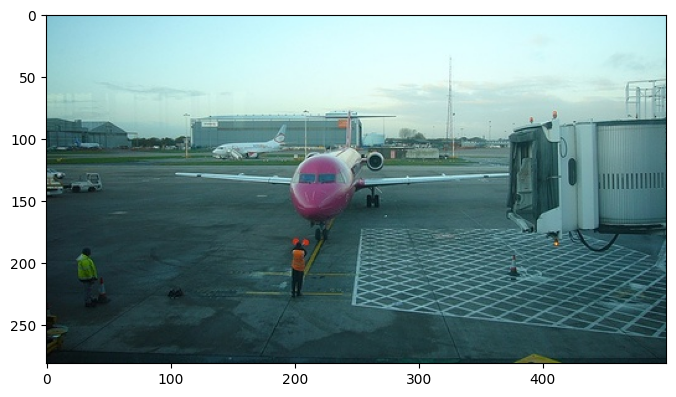

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 코랩 버전은 상대 경로를 사용하지 않습니다. /content 디렉토리를 기준으로 절대 경로를 이용합니다. 
# default_dir 은 /content/data 로 지정하고 os.path.join()으로 상세 파일/디렉토리를 지정합니다. 
default_dir = '.'
img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()


#### Annotations 디렉토리에 있는 임의의 annotation 파일 보기

In [4]:
!cat VOCdevkit/VOC2012/Annotations/2007_000032.xml

'cat'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


#### SegmentationObject 디렉토리에 있는 있는 임의의 maksing 이미지 보기 

img shape: (281, 500, 3)


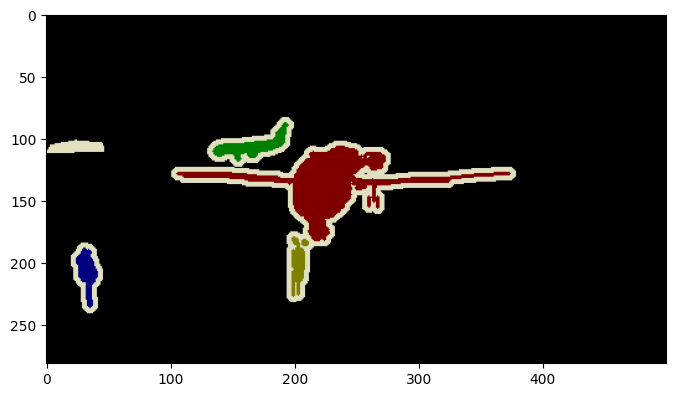

In [2]:

img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/SegmentationObject/2007_000032.png'))
# img = cv2.imread(os.path.join(default_dir, 'VOCdevkit/VOC2012/SegmentationClass/2007_000032.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

#### Annotation xml 파일에 있는 요소들을 파싱하여 접근하기
* ElementTree를 이용하여 XML 파싱(lxml 패키지는 이미 코랩에 설치됨. pip install lxml)

In [3]:
import os
import random

# 코랩 버전 절대경로 수정. 
VOC_ROOT_DIR ="VOCdevkit/VOC2012/"
ANNO_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, "JPEGImages")

xml_files = os.listdir(ANNO_DIR)                       
print(xml_files[:5]); print(len(xml_files))

['2007_000027.xml', '2007_000032.xml', '2007_000033.xml', '2007_000039.xml', '2007_000042.xml']
17125


In [4]:
# !pip install lxml
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

# XML 파일을 Parsing 하여 Element 생성
tree = ET.parse(xml_file)
root = tree.getroot()

# image 관련 정보는 root의 자식으로 존재
image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)
image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)

# 파일내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'):
    # object element의 자식 element에서 bndbox를 찾음. 
    xmlbox = obj.find('bndbox')
    # bndbox element의 자식 element에서 xmin,ymin,xmax,ymax를 찾고 이의 값(text)를 추출 
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)
    
    bndbox_pos = (x1, y1, x2, y2)
    class_name=obj.find('name').text
    object_dict={'class_name': class_name, 'bndbox_pos':bndbox_pos}
    objects_list.append(object_dict)

print('full_image_name:', full_image_name,'\n', 'image_size:', (image_width, image_height))

for object in objects_list:
    print(object)

    

full_image_name: VOCdevkit/VOC2012/JPEGImages\2007_000032.jpg 
 image_size: (500, 281)
{'class_name': 'aeroplane', 'bndbox_pos': (104, 78, 375, 183)}
{'class_name': 'aeroplane', 'bndbox_pos': (133, 88, 197, 123)}
{'class_name': 'person', 'bndbox_pos': (195, 180, 213, 229)}
{'class_name': 'person', 'bndbox_pos': (26, 189, 44, 238)}


#### Annotation내의 Object들의 bounding box 정보를 이용하여 Bounding box 시각화

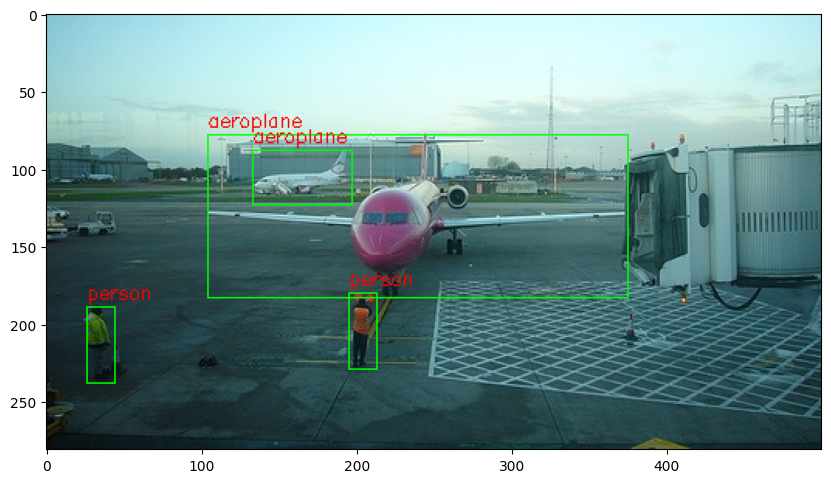

In [5]:
import cv2
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)

img = cv2.imread(full_image_name)
# opencv의 rectangle()는 인자로 들어온 이미지 배열에 그대로 사각형을 그려주므로 별도의 이미지 배열에 그림 작업 수행. 
draw_img = img.copy()
# OpenCV는 RGB가 아니라 BGR이므로 빨간색은 (0, 0, 255)
green_color=(0, 255, 0)
red_color=(0, 0, 255)

# 파일내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')
    
    left = int(xmlbox.find('xmin').text)
    top = int(xmlbox.find('ymin').text)
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)
    
    class_name=obj.find('name').text
    
    # draw_img 배열의 좌상단 우하단 좌표에 녹색으로 box 표시 
    cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=1)
    # draw_img 배열의 좌상단 좌표에 빨간색으로 클래스명 표시
    cv2.putText(draw_img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)